In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random as r
from scipy import stats
from scipy.optimize import curve_fit

# Monte Carlo exponential and uniform separaterly

In [8]:
# exponential distribution
def M_CDF(mu):
    return 1-np.exp(-mu) # integrate M(mu) from 0 to mu bc mu needs to be positive (polar coords)

def M_inverseCDF(r):
    return -np.log(np.abs(1-r))

# uniform distribution
def Theta_CDF(theta):
    return theta/(2*np.pi)

def Theta_inverseCDF(r):
    return r*2*np.pi

In [9]:
Nsamp = 1e7
trials = range(int(Nsamp))

values_mu = np.zeros(int(Nsamp))
values_theta = np.zeros(int(Nsamp))

# Generate mu and theta separately
for i in trials:
    r1 = r.random() # value between 0 and 1
    r2 = r.randrange(-1000, 1000)/1000 # value between -1 and 1
    
    values_mu[i] = M_inverseCDF(r1) # store randomly generated mu's
    values_theta[i] = Theta_inverseCDF(r2) # store randomly generated theta's

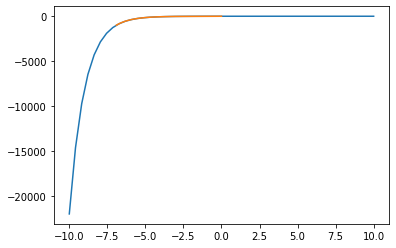

In [10]:
# debugging

test = np.linspace(-10, 10)
plt.plot(test, M_CDF(test))

test_r = np.linspace(-1000, 0)
plt.plot(M_inverseCDF(test_r), test_r)

plt.show()

# Convert back to x and y

In [11]:
# Convert to polar coordinates (mu --> r)

sigma = 1 # arbitrary

values_r = np.sqrt(2*sigma**2 * values_mu)

In [12]:
# Convert to cartesian

x = values_r*np.cos(values_theta)
y = values_r*np.sin(values_theta)

print("mean", np.mean(x))
print("std", np.std(x))

mean 0.000619191244135961
std 1.000214604337614


# Plotting

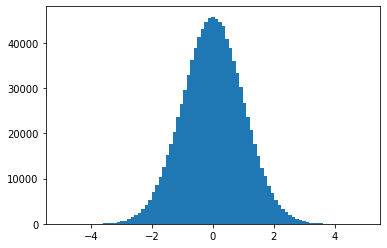

In [21]:
bins = np.linspace(-5, 5, 88)
hist = plt.hist(x, bins)

counts = hist[0]
bin_edges = hist[1]



bin_widths = np.mean(np.diff(bin_edges))
bin_middles = bin_edges+bin_widths/2
bin_middles = bin_middles[:-1]

# normalize
norm = Nsamp*bin_widths
counts /= norm

plt.show()

## Verify quantitatively that your random number generator works.

[0.00028452 0.00082355 0.00082355]


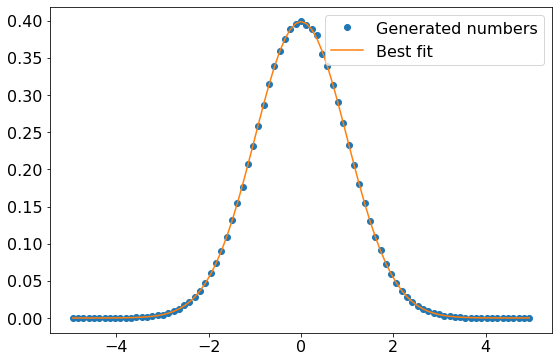

Mean of the best fit curve: 0.0014317235613650415 +/- 0.0008235514201782241
Stdev of the best fit curve: 0.9999019302431702 +/- 0.0008235514709246597


In [22]:
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(9,6))
plt.plot(bin_middles, counts, "o", label="Generated numbers")

# Define the Gaussian function
def Gauss(x, A, s, mu):
    y = A*np.exp(-1/2*(x-mu)**2/s**2)
    return y

# do a best fit
parameters, covariance = curve_fit(Gauss, bin_middles, counts)

fit_A = parameters[0]
fit_s = parameters[1]
fit_mu = parameters[2]

perr = np.sqrt(np.diag(covariance))
print(perr)

fitted_data = Gauss(bin_middles, fit_A, fit_s, fit_mu)
plt.plot(bin_middles, fitted_data, label="Best fit")
plt.legend()
plt.show()

print("Mean of the best fit curve:", fit_mu, "+/-", perr[2])
print("Stdev of the best fit curve:", fit_s, "+/-", perr[1])

## Estimate errors on the mean and on stdev

In [15]:
Nruns = 10
Nsamp = 1e6
trials = range(int(Nsamp))

means = np.zeros(Nruns)
stdevs = np.zeros(Nruns)

sigma = 1 # arbitrary
    
for n in range(Nruns):
    print("Starting run", str(n+1))
    
    values_mu = np.zeros(int(Nsamp))
    values_theta = np.zeros(int(Nsamp))

    # Generate mu and theta separately
    for i in trials:
        r1 = r.random() # value between 0 and 1
        r2 = r.randrange(-1000, 1000)/1000 # value between -1 and 1

        values_mu[i] = M_inverseCDF(r1) # store randomly generated mu's
        values_theta[i] = Theta_inverseCDF(r2) # store randomly generated theta's
        
    # Convert to polar coordinates (mu --> r)
    values_r = np.sqrt(2*sigma**2 * values_mu)
        
    # Convert to cartesian
    x = values_r*np.cos(values_theta)
    y = values_r*np.sin(values_theta)

    print("mean", np.mean(x))
    print("std", np.std(x))
    print()
    
    means[n] = np.mean(x)
    stdevs[n] = np.std(x)

Starting run 0
mean -0.0012935379224399686
std 1.0002911214180938

Starting run 1
mean 0.0009010617171130125
std 0.9993145460331483

Starting run 2
mean -0.0013923373655240095
std 0.9999170489736611

Starting run 3
mean 0.0011256724937726051
std 0.999909964356035

Starting run 4
mean -0.0028957922331523337
std 0.9993527547101908

Starting run 5
mean -0.0006105918370220525
std 0.9991478558192641

Starting run 6
mean -0.001961905940382476
std 1.0008381849183456

Starting run 7
mean -0.0011654920086404058
std 1.0009410123581137

Starting run 8
mean -0.0018846436562080914
std 0.9989244579408691

Starting run 9
mean 0.0003656216738095592
std 1.0000308988764781



In [20]:
# error on the mean
print(np.mean(means), "+/-", np.std(means))

# error on the stdev
print(np.mean(stdevs), "+/-", np.std(stdevs))

-0.0008811945078674161 +/- 0.0012480905167467345
0.9998667845404199 +/- 0.0006544465120178653


hi
hi
hi
hi
hi
hi
hi
hi
hi
hi


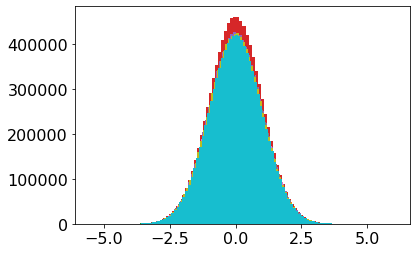

In [36]:
for n in range(Nruns):
    print("hi")
    plt.hist(np.random.normal(means[n], stdevs[n], int(10e6)), bins=100)
    
plt.show()
